 #Problem Set 3 

QUESTION 1

In [1]:
# Step 1
import pandas as pd

# Step 2 and 3
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|', index_col='user_id')

# Step 4
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_by_occupation)
print("******")

# Step 5
def male_ratio(x):
    male_count = sum(x == 'M')
    total_count = len(x)
    return male_count / total_count

male_ratio_by_occupation = users.groupby('occupation')['gender'].apply(male_ratio).sort_values(ascending=False)
print(male_ratio_by_occupation)
print("******")

# Step 6
min_age_by_occupation = users.groupby('occupation')['age'].min()
max_age_by_occupation = users.groupby('occupation')['age'].max()
print("Minimum age by occupation:")
print(min_age_by_occupation)
print("Maximum age by occupation:")
print(max_age_by_occupation)
print("******")

# Step 7
mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occupation_sex)
print("******")

# Step 8
gender_counts_by_occupation = users.groupby(['occupation', 'gender']).size()
total_counts_by_occupation = users.groupby('occupation').size()
gender_percentages_by_occupation = (gender_counts_by_occupation / total_counts_by_occupation) * 100
print(gender_percentages_by_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
******
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer        

Question 2

In [12]:
# Step 1
import pandas as pd

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
df = pd.read_csv(url)

# Step 4
goals = euro12['Goals']

# Step 5
num_teams = euro12['Team'].nunique()
print("Number of teams participated in Euro2012: ", num_teams)

# Step 6
num_cols = euro12.shape[1]
print("Number of columns in the dataset: ", num_cols)

# Step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)

# Step 9
mean_yellow_cards_per_team = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per team: ", mean_yellow_cards_per_team)

# Step 10
teams_with_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Step 11
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12
first_7_cols = euro12.iloc[:, :7]

# Step 13
all_but_last_3_cols = euro12.iloc[:, :-3]

# Step 14
eng_ita_rus_shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(eng_ita_rus_shooting_accuracy)


Number of teams participated in Euro2012:  16
Number of columns in the dataset:  35
Mean Yellow Cards given per team:  7.4375
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3

In [23]:
# Step 1
import pandas as pd
import numpy as np

# Step 2
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

# Step 3
df = pd.concat([series1, series2, series3], axis=1)

# Step 4
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5
bigcolumn = pd.concat([series1, series2, series3], axis=0)

# Step 6
print(bigcolumn.index[-1])

# Step 7
df = df.reset_index(drop=True)
bigcolumn = bigcolumn.reset_index(drop=True)


99


Question 4

In [24]:
import pandas as pd
import numpy as np

# Step 2
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
data = pd.read_csv(url)

# Step 6
missing_values = data.isnull().sum()

# Step 7
non_missing_values = data.notnull().sum().sum()

# Step 8
mean_windspeed = data.mean().mean()

# Step 9
loc_stats = pd.DataFrame()
loc_stats['Min'] = data.min()
loc_stats['Max'] = data.max()
loc_stats['Mean'] = data.mean()
loc_stats['Std'] = data.std()

# Step 10
day_stats = pd.DataFrame()
day_stats['Min'] = data.min(axis=1)
day_stats['Max'] = data.max(axis=1)
day_stats['Mean'] = data.mean(axis=1)
day_stats['Std'] = data.std(axis=1)

# Step 11
data.index = pd.to_datetime(data.index)
jan_data = data[data.index.month == 1]

jan_mean = jan_data.mean()

# Step 12
yearly_data = data.resample('A').mean()

# Step 13
monthly_data = data.resample('M').mean()

# Step 14
weekly_data = data.resample('W').mean()

# Step 15
weekly_stats = pd.DataFrame()
weekly_stats['Min'] = weekly_data.min(axis=1)
weekly_stats['Max'] = weekly_data.max(axis=1)
weekly_stats['Mean'] = weekly_data.mean(axis=1)
weekly_stats['Std'] = weekly_data.std(axis=1)

weekly_stats = weekly_stats.iloc[:52]

print("Missing values: \n", missing_values)
print("Non-missing values: ", non_missing_values)
print("Mean windspeed: ", mean_windspeed)
print("Location statistics: \n", loc_stats)
print("Day statistics: \n", day_stats)
print("Mean windspeed in January: \n", jan_mean)
print("Yearly frequency data: \n", yearly_data)
print("Monthly frequency data: \n", monthly_data)
print("Weekly frequency data: \n", weekly_data)
print("Weekly statistics: \n", weekly_stats)


Missing values: 
 Team                          0
Goals                         0
Shots on target               0
Shots off target              0
Shooting Accuracy             0
% Goals-to-shots              0
Total shots (inc. Blocked)    0
Hit Woodwork                  0
Penalty goals                 0
Penalties not scored          0
Headed goals                  0
Passes                        0
Passes completed              0
Passing Accuracy              0
Touches                       0
Crosses                       0
Dribbles                      0
Corners Taken                 0
Tackles                       0
Clearances                    0
Interceptions                 0
Clearances off line           1
Clean Sheets                  0
Blocks                        0
Goals conceded                0
Saves made                    0
Saves-to-shots ratio          0
Fouls Won                     0
Fouls Conceded                0
Offsides                      0
Yellow Cards          

C:\Users\Admin\AppData\Local\Temp\ipykernel_10456\3831965453.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_windspeed = data.mean().mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_10456\3831965453.py:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loc_stats['Mean'] = data.mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_10456\3831965453.py:22: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' 

Question 5

In [27]:
# Step 1
import pandas as pd

# Step 2 and 3
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

# Step 4
print(chipo.head(10))

# Step 5
print(len(chipo))

# Step 6
print(len(chipo.columns))

# Step 7
print(chipo.columns)

# Step 8
print(chipo.index)

# Step 9
item_counts = chipo['item_name'].value_counts()
most_ordered_item = item_counts.index[0]
print(most_ordered_item)

# Step 10
item_quantity = item_counts.values[0]
print(item_quantity)

# Step 11
choice_counts = chipo['choice_description'].value_counts()
most_common_choice = choice_counts.index[0]
print(most_common_choice)

# Step 12
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)

# Step 13
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo['item_price'].dtype)

# Step 14
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)

# Step 15
num_orders = len(chipo['order_id'].unique())
print(num_orders)

# Step 16
average_revenue_per_order = revenue / num_orders
print(average_revenue_per_order)

# Step 17
num_items_sold = len(chipo['item_name'].unique())
print(num_items_sold)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

Question 6

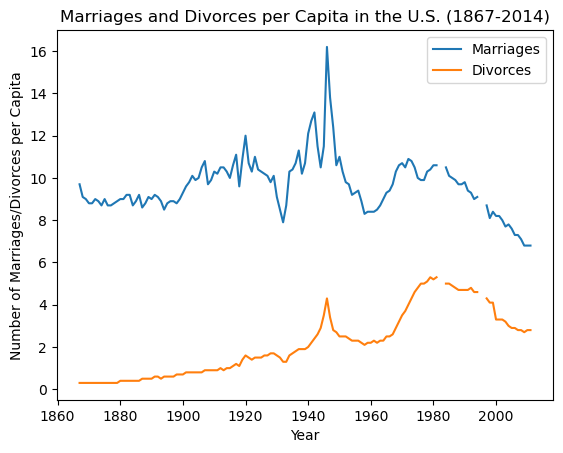

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('C:/Users/Admin/Downloads/us-marriages-divorces-1867-2014.csv', index_col=0)


# Step 2: Create a line plot
plt.plot(data.index, data['Marriages_per_1000'], label='Marriages')
plt.plot(data.index, data['Divorces_per_1000'], label='Divorces')

# Step 3: Add title, labels, and legend
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Marriages/Divorces per Capita')
plt.legend()

# Step 4: Show the plot
plt.show()


Question 7

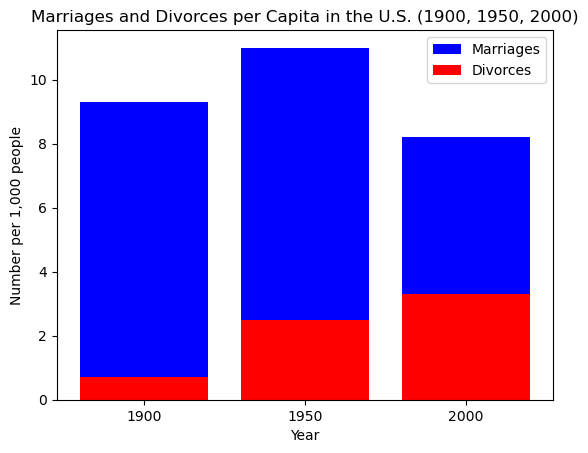

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('C:/Users/Admin/Downloads/us-marriages-divorces-1867-2014.csv')

# Filter the data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
data = data[data['Year'].isin(years)]

# Extract the number of marriages and divorces per capita for each year
marriages = data[data['Marriages_per_1000'] != 0]['Marriages_per_1000'].tolist()
divorces = data[data['Divorces_per_1000'] != 0]['Divorces_per_1000'].tolist()

# X-axis labels
years = [str(year) for year in years]

# Plot the data as vertical bar chart
plt.bar(years, marriages, color='blue', label='Marriages')
plt.bar(years, divorces, color='red', label='Divorces')

# Add a title and axis labels
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Number per 1,000 people')

# Add a legend and display the chart
plt.legend()
plt.show()


Question 8

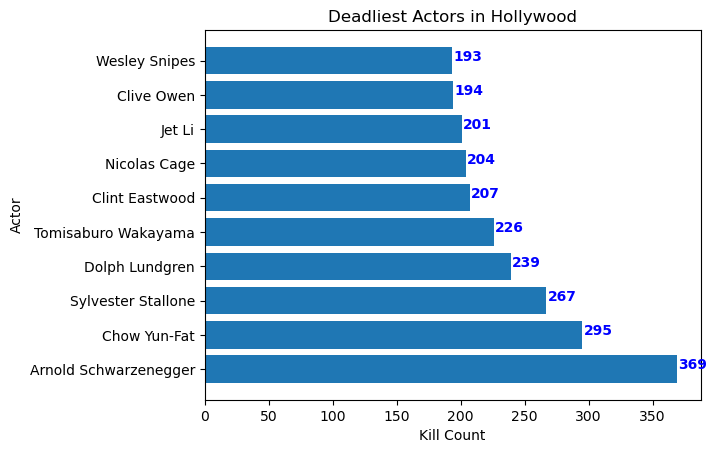

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('C:/Users/Admin/Downloads/actor_kill_counts.csv')

# Sort the DataFrame by kill count in descending order
data = data.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart
plt.barh(data['Actor'], data['Count'], align='center')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Add labels to each bar
for i, v in enumerate(data['Count']):
    plt.text(v + 1, i, str(v), color='blue', fontweight='bold')

# Show the plot
plt.show()


Question 9

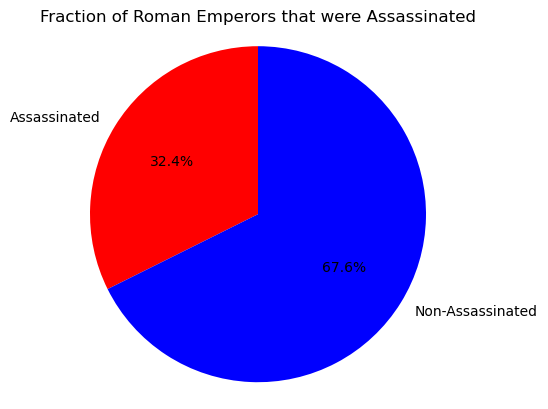

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('C:/Users/Admin/Downloads/roman-emperor-reigns.csv')

# Count the number of assassinations and non-assassinations
assassinations = data[data['Cause_of_Death'] == 'Assassinated']['Cause_of_Death'].count()
non_assassinations = data[data['Cause_of_Death'] != 'Assassinated']['Cause_of_Death'].count()

# Calculate the percentage of assassinations and non-assassinations
total = assassinations + non_assassinations
assassination_percent = assassinations / total * 100
non_assassination_percent = non_assassinations / total * 100

# Create a pie chart
labels = ['Assassinated', 'Non-Assassinated']
sizes = [assassination_percent, non_assassination_percent]
colors = ['red', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Fraction of Roman Emperors that were Assassinated')

# Make the pie chart an even circle
plt.axis('equal')

# Show the plot
plt.show()


Question 10

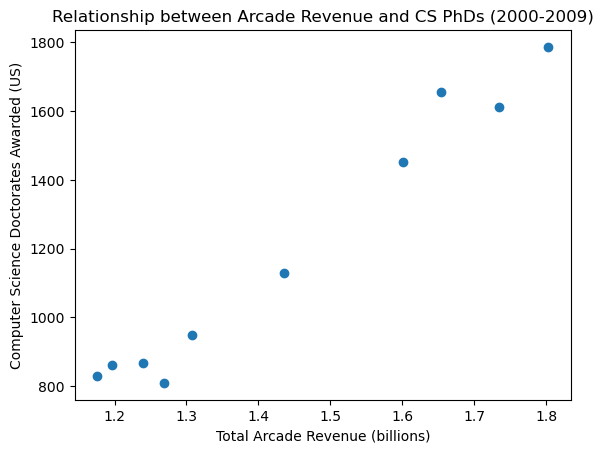

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/Admin/Downloads/arcade-revenue-vs-cs-doctorates.csv")

# Extract the data for the years 2000-2009
years = range(2000, 2010)
data = data[data['Year'].isin(years)]

# Extract the total revenue and number of CS PhDs awarded for each year
revenue = data['Total Arcade Revenue (billions)']
cs_phds = data['Computer Science Doctorates Awarded (US)']

# Create the scatter plot
plt.scatter(revenue, cs_phds)

# Add axis labels and a title
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.title("Relationship between Arcade Revenue and CS PhDs (2000-2009)")

# Display the plot
plt.show()
